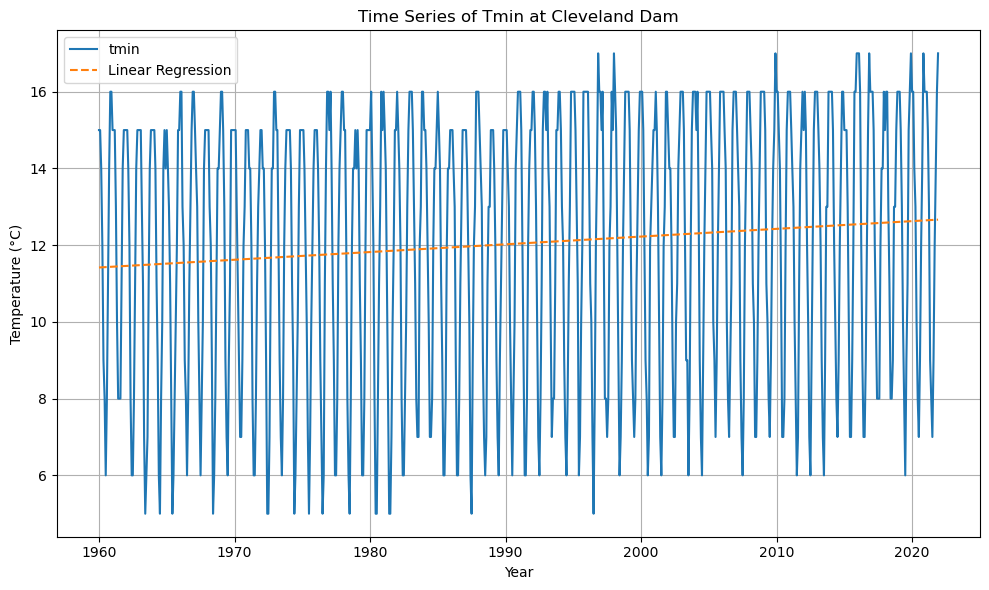

Linear Regression Coefficients:
Slope: 0.0016783185607344236
Intercept: 11.418171321353828


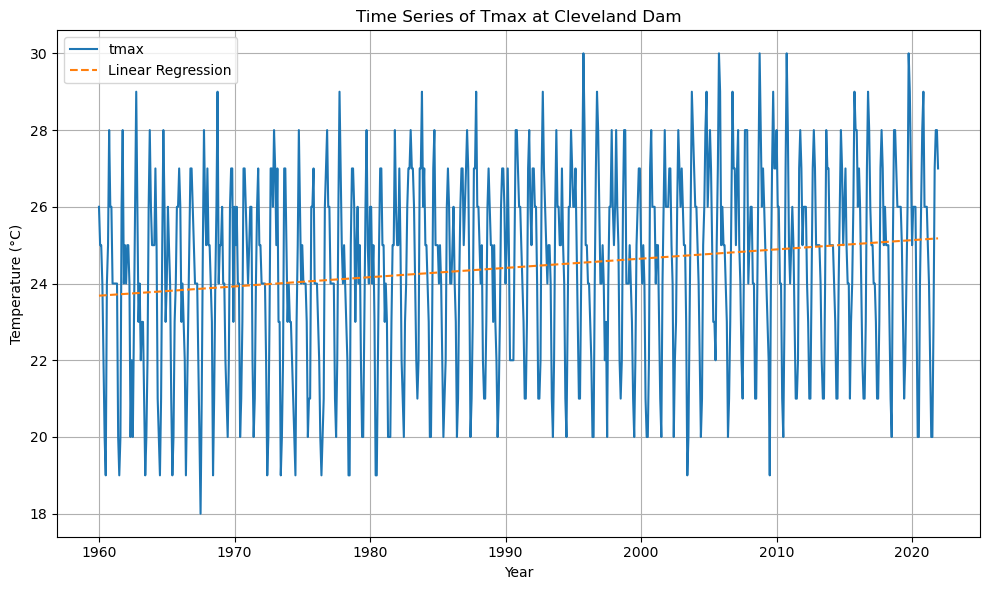

Linear Regression Coefficients:
Slope: 0.002010946068917168
Intercept: 23.683041062278992


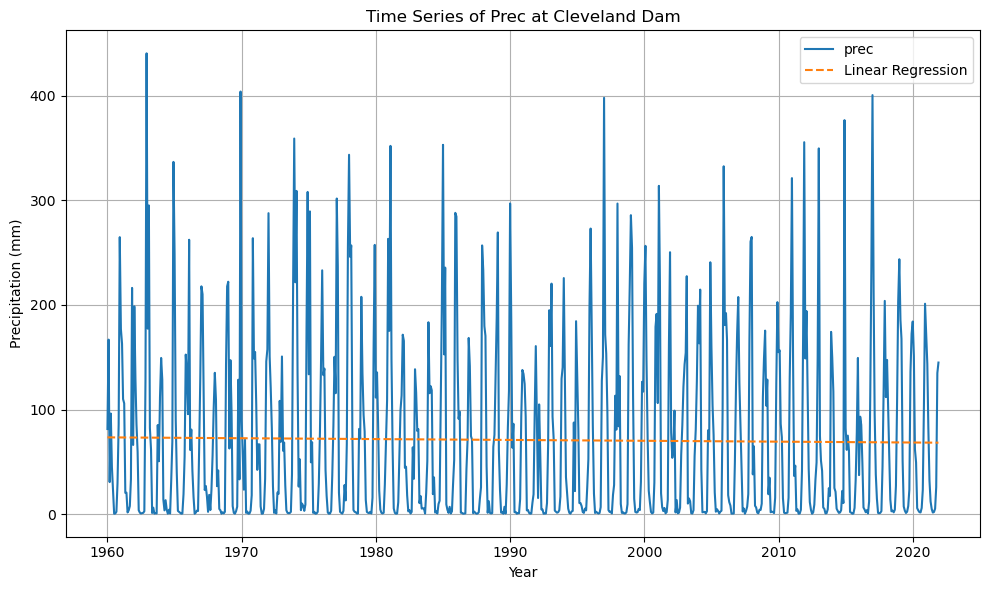

Linear Regression Coefficients:
Slope: -0.0068243797854085604
Intercept: 73.52813343436529


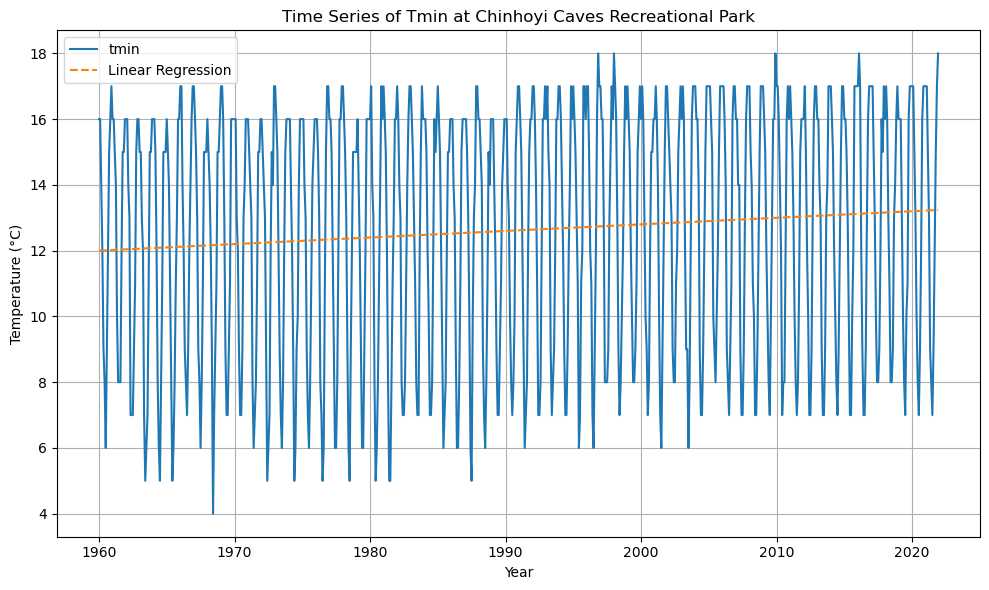

Linear Regression Coefficients:
Slope: 0.0016652792010995606
Intercept: 11.999628346683988


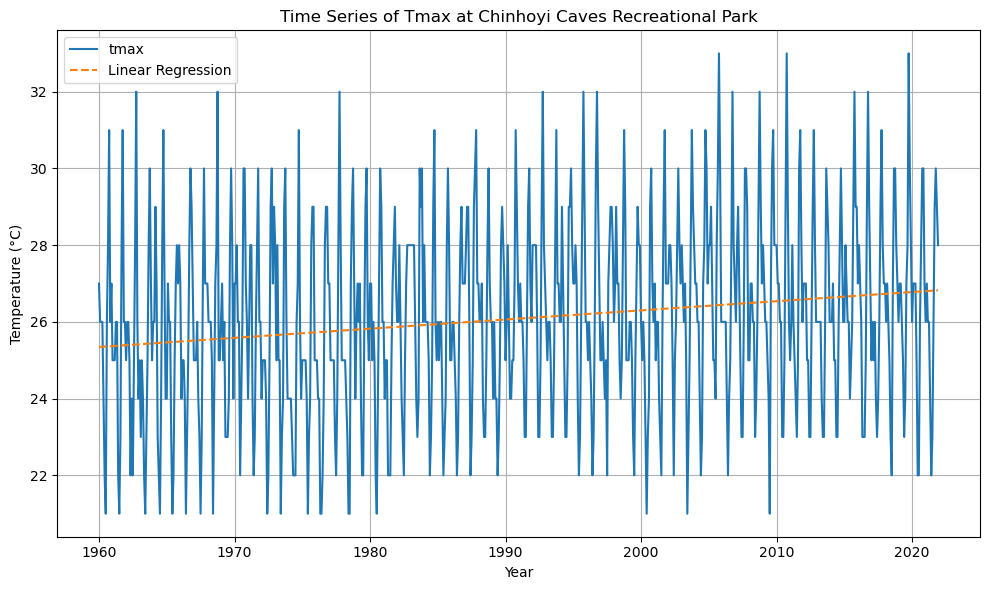

Linear Regression Coefficients:
Slope: 0.0019893109303051326
Intercept: 25.345648408746484


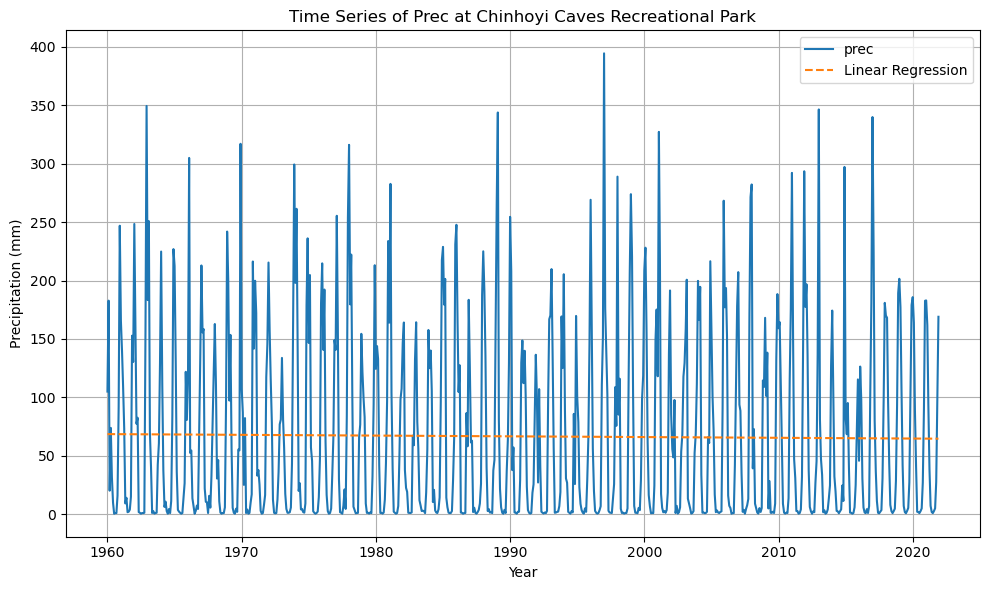

Linear Regression Coefficients:
Slope: -0.005276912291293769
Intercept: 68.61050732481777


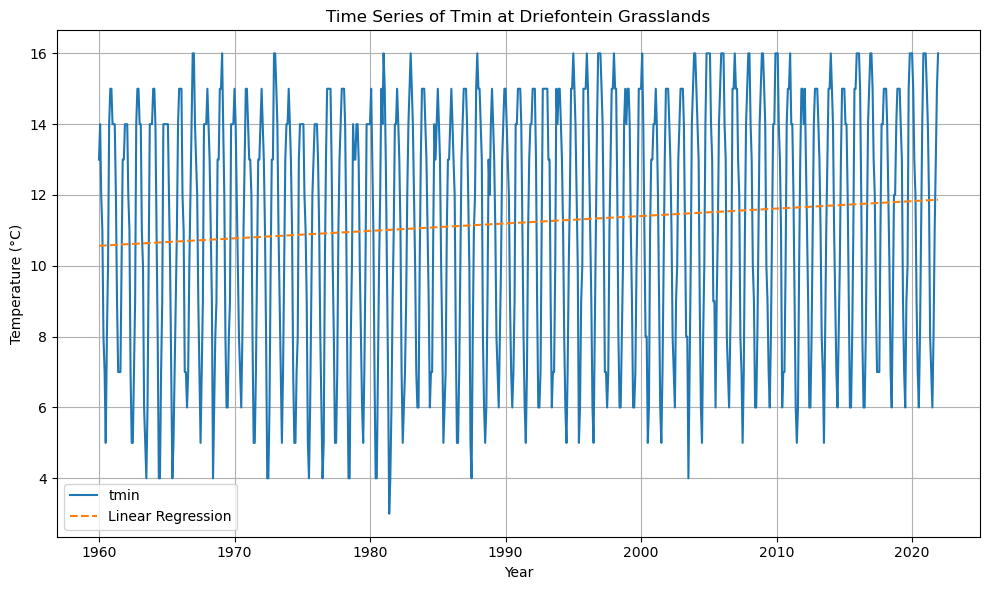

Linear Regression Coefficients:
Slope: 0.0017506979335455961
Intercept: 10.566013567150177


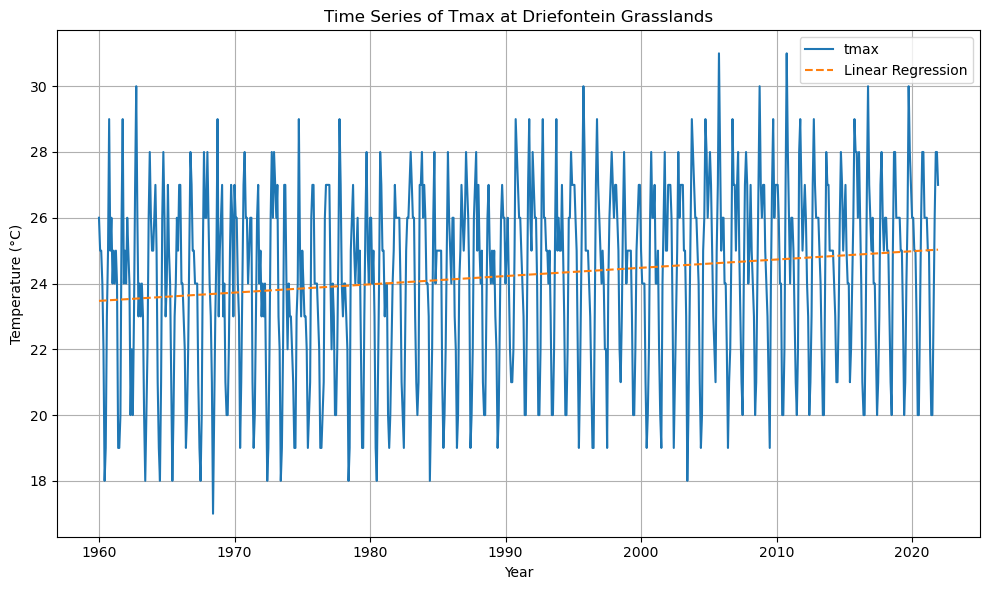

Linear Regression Coefficients:
Slope: 0.0020964230778308447
Intercept: 23.472522912607346


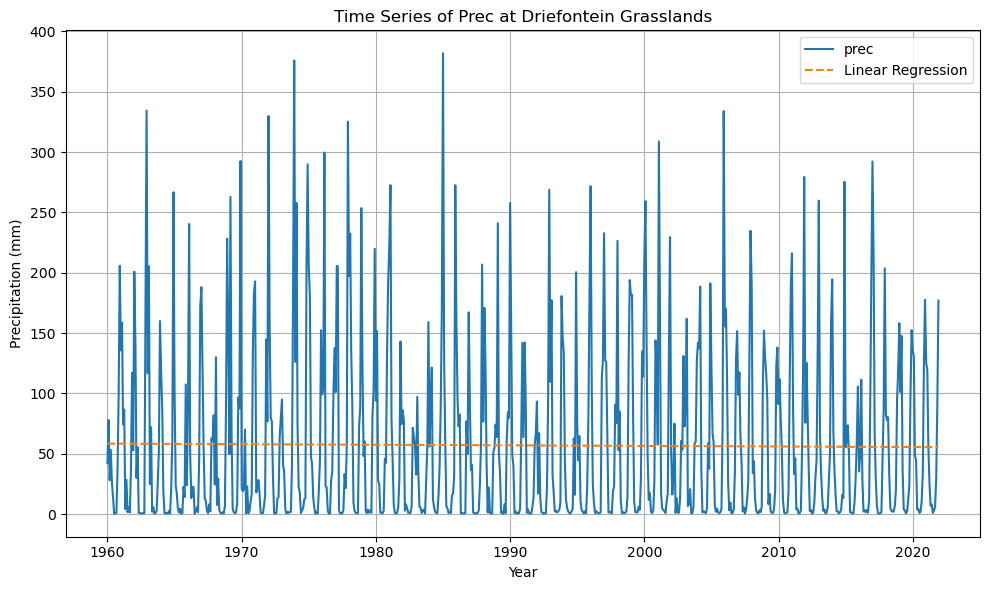

Linear Regression Coefficients:
Slope: -0.0039633272016776615
Intercept: 58.47882766832648


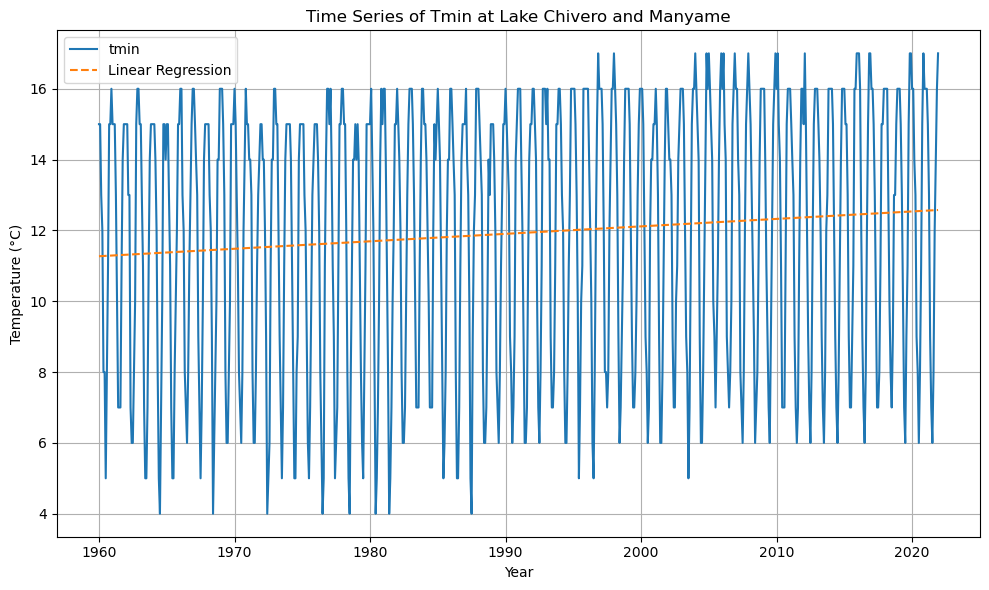

Linear Regression Coefficients:
Slope: 0.0017568752391156313
Intercept: 11.270707945442737


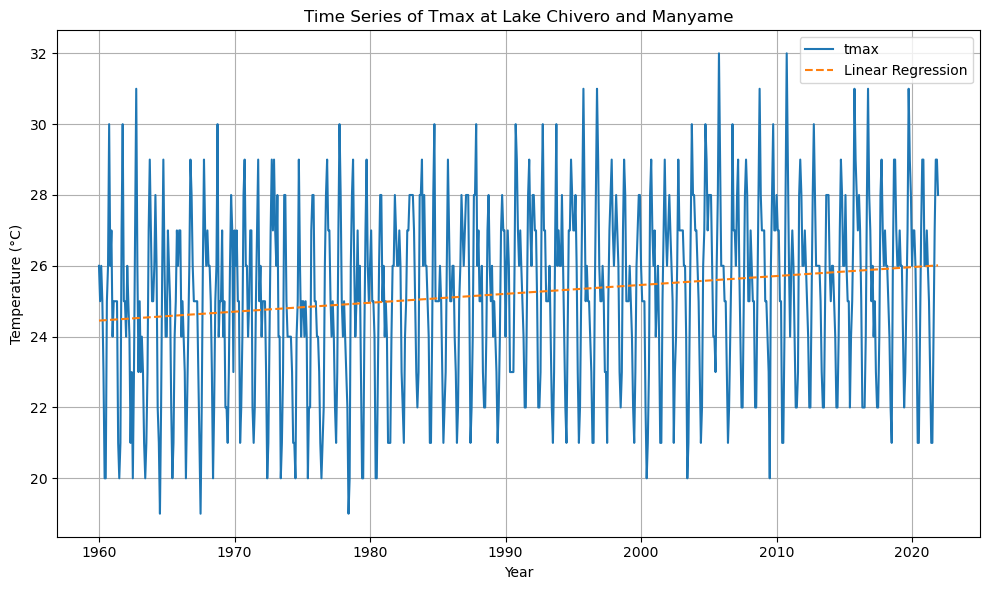

Linear Regression Coefficients:
Slope: 0.0020981422336262805
Intercept: 24.453067041928268


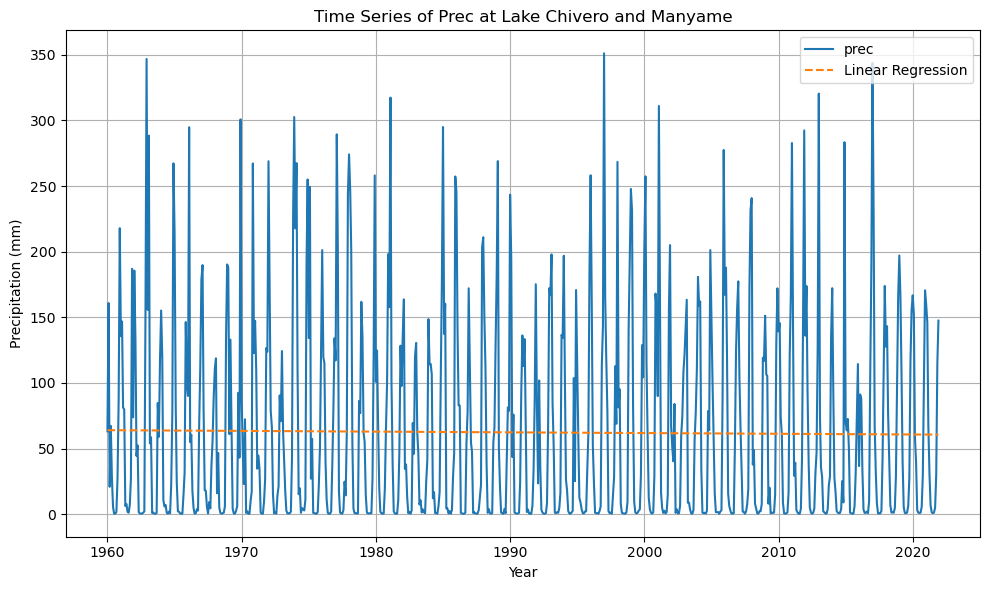

Linear Regression Coefficients:
Slope: -0.004558928727005926
Intercept: 64.02495922638377


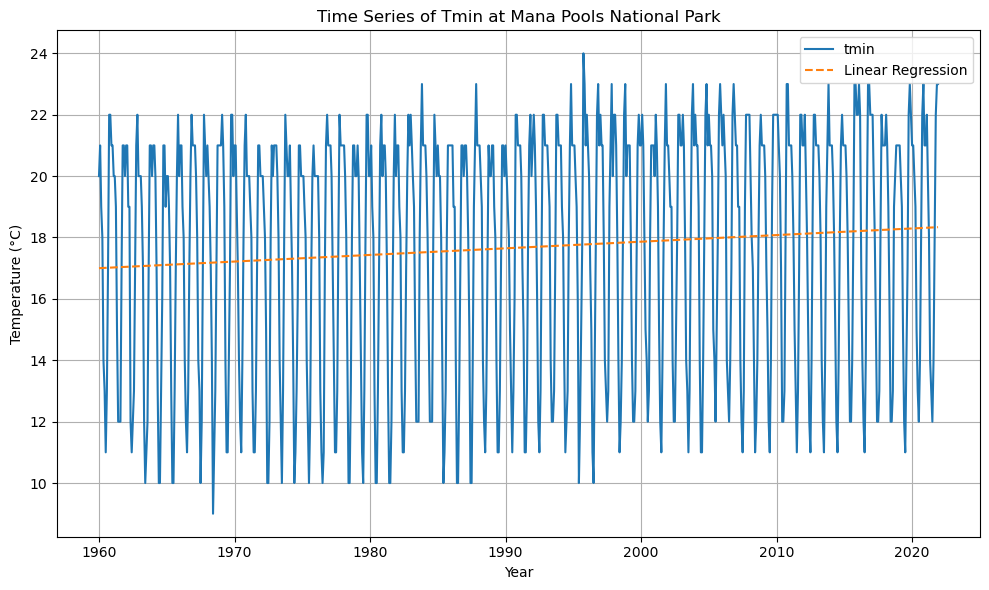

Linear Regression Coefficients:
Slope: 0.0017968820341517583
Intercept: 17.000469077000794


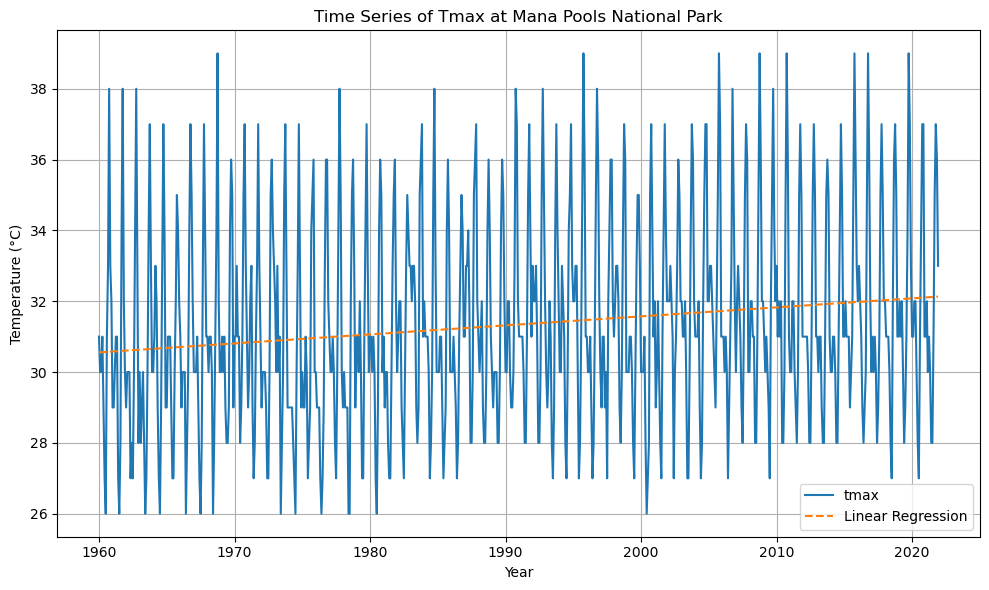

Linear Regression Coefficients:
Slope: 0.0021207243648374953
Intercept: 30.55489283394674


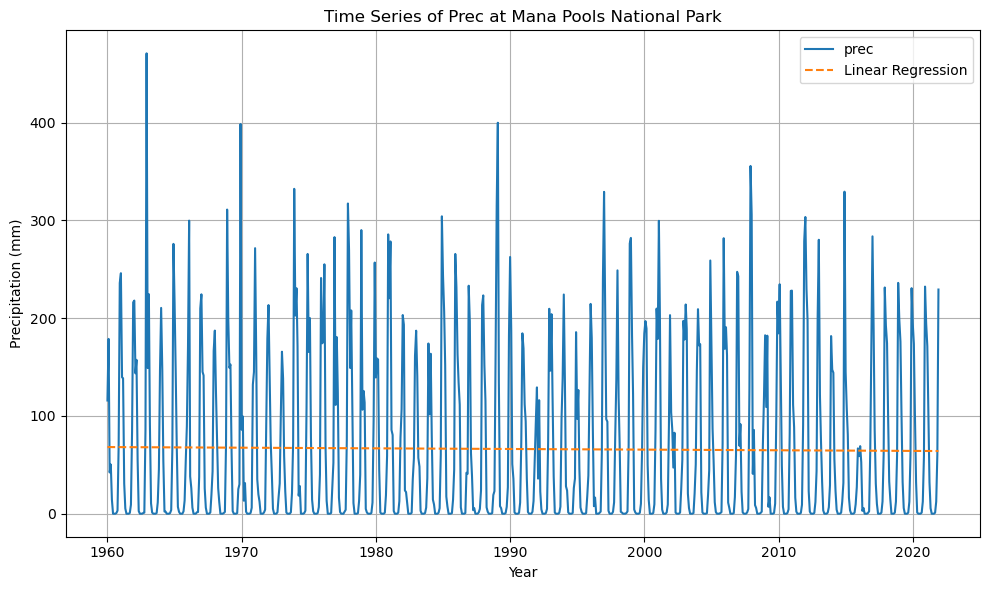

Linear Regression Coefficients:
Slope: -0.005477878689956669
Intercept: 68.17683300858772


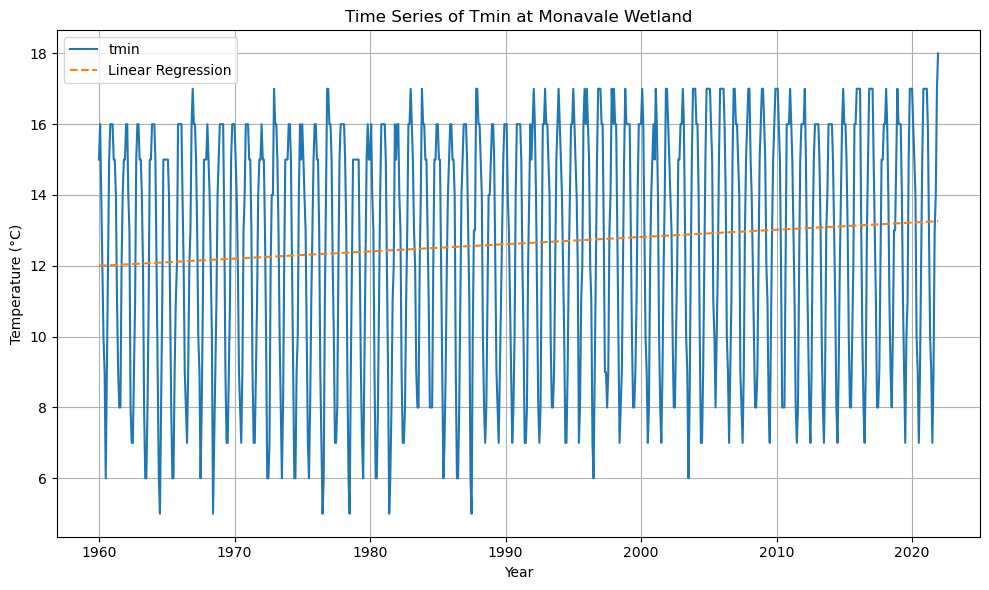

Linear Regression Coefficients:
Slope: 0.0016977537626929797
Intercept: 11.99966082124558


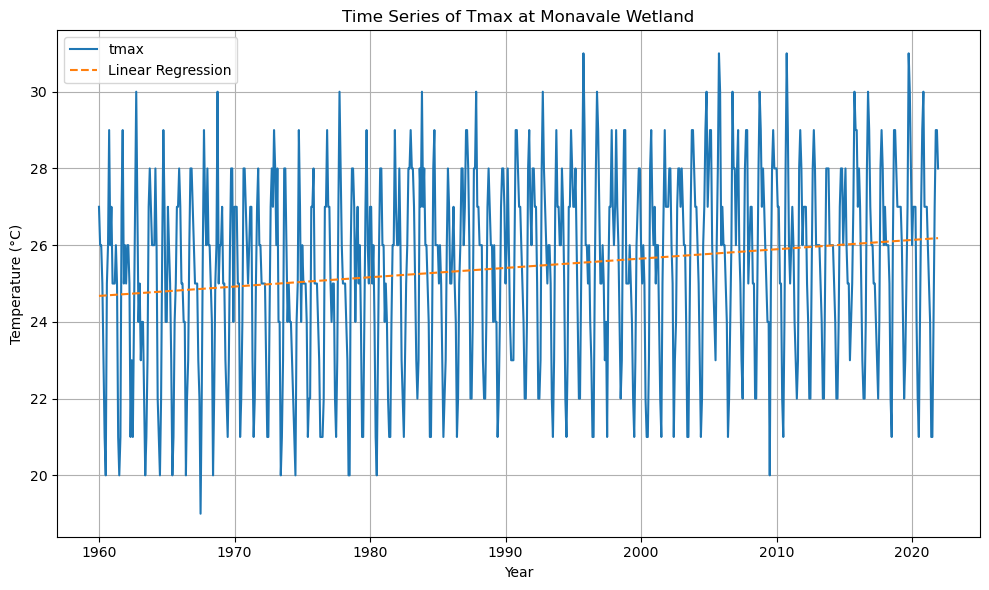

Linear Regression Coefficients:
Slope: 0.002026913821051034
Intercept: 24.67710904236126


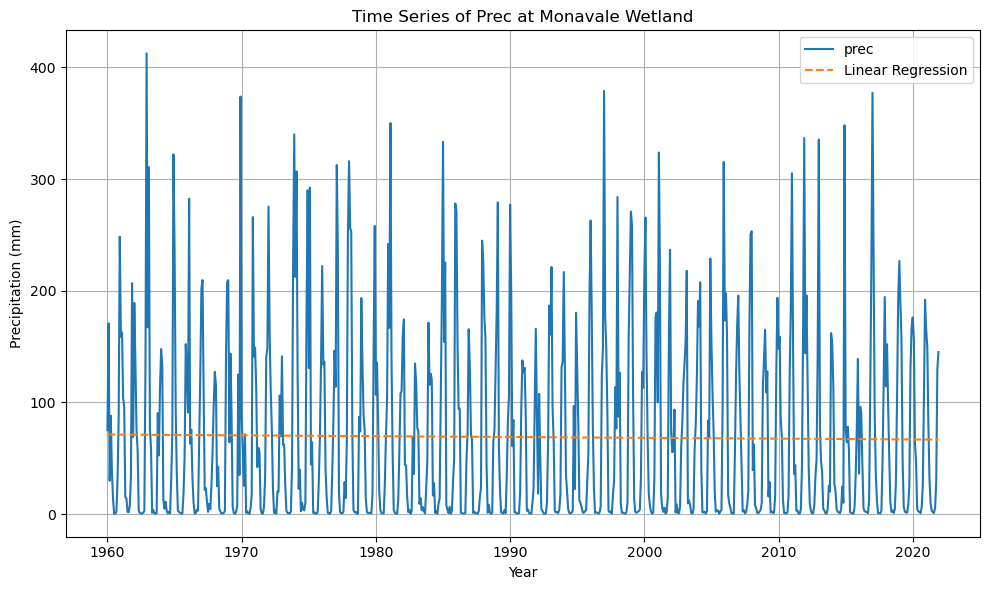

Linear Regression Coefficients:
Slope: -0.006141279057739453
Intercept: 71.28981850328353


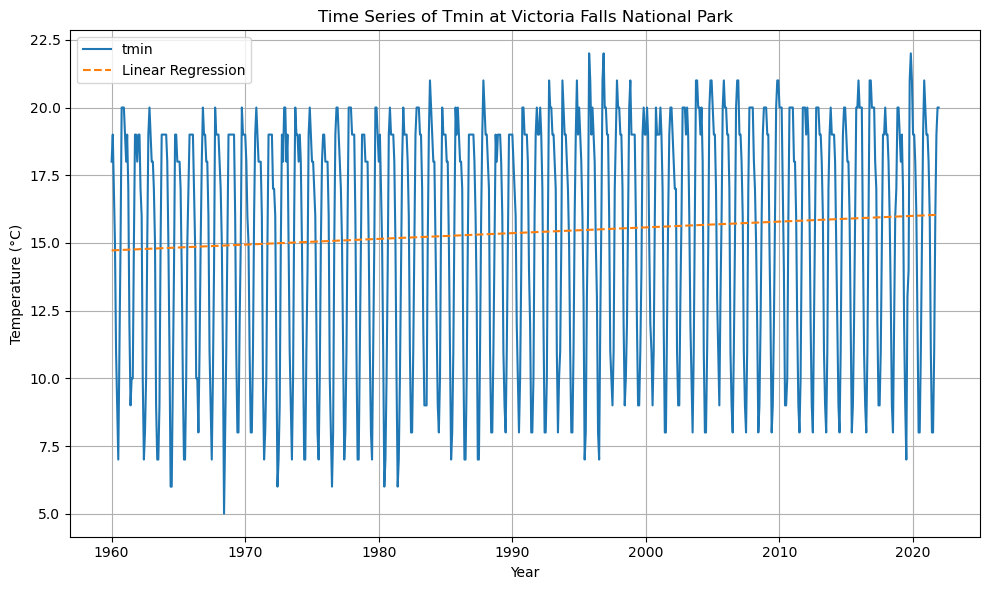

Linear Regression Coefficients:
Slope: 0.0017703225340239869
Intercept: 14.724045608717615


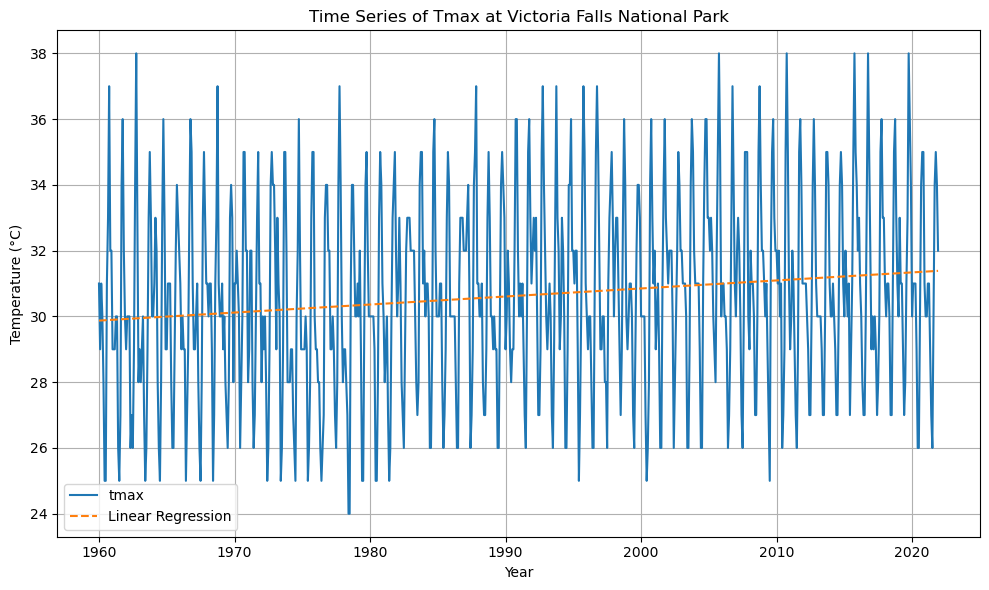

Linear Regression Coefficients:
Slope: 0.0020352473559238178
Intercept: 29.872937865338816


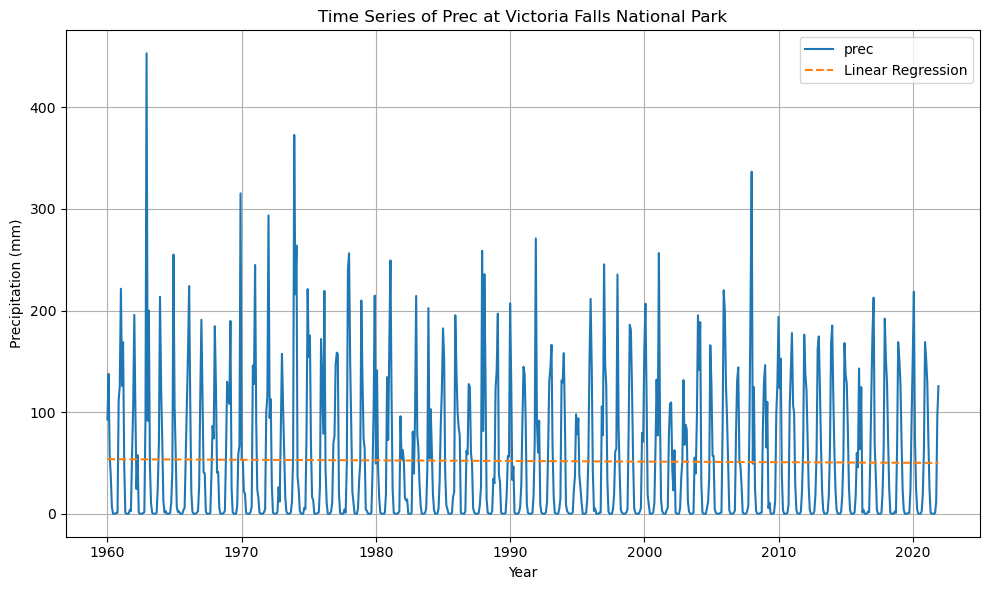

Linear Regression Coefficients:
Slope: -0.0049772051596818955
Intercept: 53.68733816843473


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def analyze_climate_data(csv_file, variable, site):
    """
    Function to analyze climate data for a given site and variable.
    
    Args:
        csv_file (str): Path to the CSV file containing climate data.
        variable (str): Variable to analyze ('tmin', 'tmax', 'prec').
        site (str): Name of the site for plotting purposes.
    
    Returns:
        None (plots the time series and prints linear regression coefficients).
    """
    # Load the CSV file
    df = pd.read_csv(csv_file)

    # Combine 'year' and 'month' columns into a single datetime column
    df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

    # Group by 'date' to get average temperature/precipitation for each month
    monthly_avg = df.groupby('date')[variable].mean().reset_index()

    # Plot the time series
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_avg['date'], monthly_avg[variable], label=variable)
    plt.xlabel('Year')
    if variable == 'prec':
        plt.ylabel('Precipitation (mm)')
    else:
        plt.ylabel('Temperature (°C)')
    plt.title(f'Time Series of {variable.capitalize()} at {site}')
    plt.grid(True)
    plt.legend()

    # Perform linear regression
    X = monthly_avg.index.values.reshape(-1, 1)  # Reshape to 2D array for sklearn
    y = monthly_avg[variable].values
    model = LinearRegression()
    model.fit(X, y)

    # Predict values using the linear regression model
    predictions = model.predict(X)

    # Plot the linear regression line
    plt.plot(monthly_avg['date'], predictions, label='Linear Regression', linestyle='--')

    # Display the plot
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print the linear regression coefficients
    print("Linear Regression Coefficients:")
    print("Slope:", model.coef_[0])  # Slope of the linear regression line
    print("Intercept:", model.intercept_)  # Intercept of the linear regression line

# Define the CSV files and sites
csv_files = ['site_2102_climate_data.csv', 'site_2103_climate_data.csv', 'site_2104_climate_data.csv', 'site_2105_climate_data.csv', 'site_2106_climate_data.csv', 'site_2107_climate_data.csv', 'site_2108_climate_data.csv']
sites = ['Cleveland Dam', 'Chinhoyi Caves Recreational Park', 'Driefontein Grasslands', 'Lake Chivero and Manyame', 'Mana Pools National Park', 'Monavale Wetland', 'Victoria Falls National Park']
variables = ['tmin', 'tmax', 'prec']

# Loop through each CSV file, site, and variable
for csv_file, site in zip(csv_files, sites):
    for variable in variables:
        analyze_climate_data(csv_file, variable, site)
